#Quantitative Finance: An Introduction Through Practical Approach
##Alexander Jonsson

Welcome! This notebook is designed as a primer for those new to the subject. The aim is to provide you with a hands-on understanding of some of the core concepts in quantitative finance. Let's dive in.

#What Do You Need to Create a Model?

# 1. Data

Firstly, we'll need data. The **yfinance** library in Python is a popular tool that allows us to download stock data easily. Let's download the stock data for Investor B (INVE-B.ST).



In [ ]:
import yfinance as yf

# Download stock data for INVE-B.ST
inve_data = yf.download('INVE-B.ST', start='2020-01-01', end='2022-12-31')

# Display the first few rows of the dataframe
inve_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,128.199997,131.350006,128.199997,130.750000,120.843506,4537988
2020-01-03,129.750000,129.750000,128.399994,129.300003,119.503380,3417924
2020-01-07,129.300003,130.449997,129.050003,129.500000,119.688225,3683196
2020-01-08,128.699997,129.649994,127.849998,129.449997,119.642006,3259716
2020-01-09,130.250000,131.100006,130.100006,130.500000,120.612442,3710640


This code snippet uses the yf.download function to fetch data for INVE-B.ST from January 1, 2020, to December 31, 2022. The inve_data.head() function call then displays the first few rows of the retrieved data.

### Question:
What would be the right amount of data to use when creating a model and why?

#1.1 Plot the Data

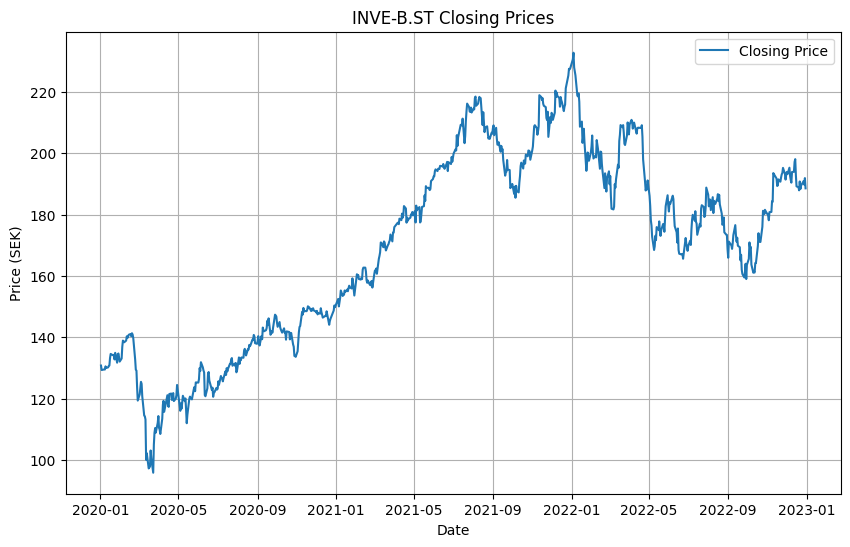

In [ ]:
import matplotlib.pyplot as plt

# Plotting the closing prices of INVE-B.ST
plt.figure(figsize=(10, 6)) # Adjusting the size of the plot
plt.plot(inve_data.index, inve_data['Close'], label='Closing Price') # Here is the main plotting logic
plt.title('INVE-B.ST Closing Prices') # Title
plt.xlabel('Date') # X-axis title
plt.ylabel('Price (SEK)') # Y-axis title
plt.grid() # Grid
plt.legend() # Display the plot lables in the graph
plt.show()


This plot gives us a visual representation of the closing prices of INVE-B.ST over time.

#1.2 What Other Features Can We Plot?

Beyond closing prices, we can also plot other features such as:

* **Volume Data:**
Shows the number of shares traded during a given period and can indicate the strength behind price movements.



* **Open, High, Low, Close (OHLC) Data:**
Offers a more detailed view of price movements within each trading day.

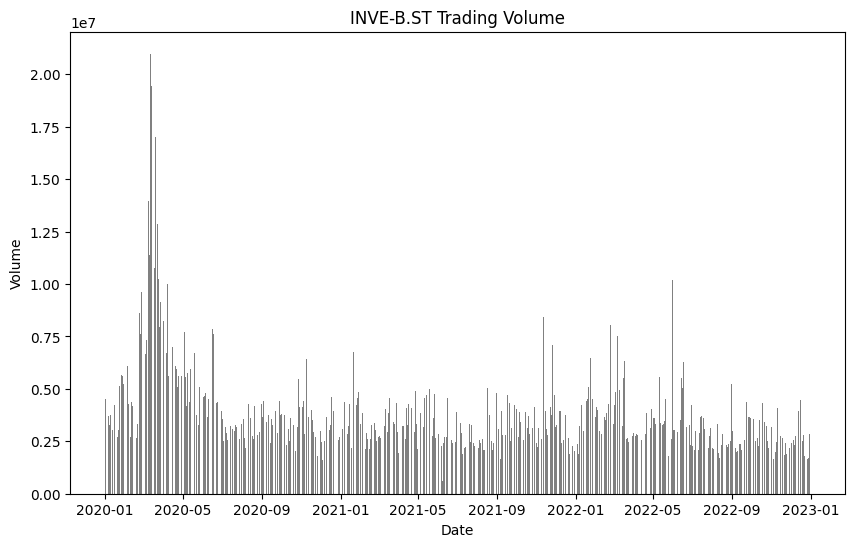

In [ ]:
# Plotting volume data
plt.figure(figsize=(10, 6))
plt.bar(inve_data.index, inve_data['Volume'], color='gray') #This time a bar plot
plt.title('INVE-B.ST Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

This plot illustrates the trading volume of INVE-B.ST, which can be valuable for understanding market activity and liquidity.

# 2. Feature Analysis

# 2.1 Indicators vs Filters

In quantitative finance, indicators and filters are tools used to analyze and predict future price movements. Indicators are mathematical calculations based on the price, volume, or open interest of a security or contract, while filters are criteria set to screen or select securities based on certain parameters.

# 2.1 Let's Look at the Smoother: Moving Average (MA)

The Moving Average (MA) is a simple yet powerful tool used to smooth out price data by creating a constantly updated average price. The most basic form of MA is the Simple Moving Average (SMA), which calculates the average price of a security over a specific number of periods.

* **Intuitively:** A moving average is calculated by taking the average price of a security over a specific number of periods. For example, a 20-day simple moving average (SMA) of a stock is found by adding up the closing prices of the stock for the last 20 days and then just dividing by 20.




#### SMA

- **Simple Moving Average (SMA)** calculates the average of a selected range of prices, typically closing prices, by the number of periods in that range.


With more formal mathematical notation, we can write the SMA as:
$$ \text{SMA}_{n}(t) = \frac{1}{n} \sum_{i=0}^{n-1} P_{t-i} $$
Get comfortable with the notation, in finance, we use way harder maths.
## Significance of MA200 and MA20

- **MA200**: This is the 200-day moving average, considered a key indicator for determining the long-term market trend. Prices above the MA200 often indicate a bullish trend, while prices below suggest a bearish trend.
- **MA20**: The 20-day moving average is used to assess the short-term market trend. It's more responsive to price changes than the MA200, making it useful for identifying shorter-term trading opportunities.



# 2.1.1 Understanding Lag in MAs

Lag is an inherent aspect of moving averages, as MAs are based on past data. The "lag" refers to the time it takes for the MA to "catch up" with the actual price movements. The longer the period of the MA (such as MA200), the greater the lag. This lag is a critical consideration when using MAs for trading signals, as it can affect the timing of entry and exit points. The lag for the MA is calculated my the formula $$\frac{n + 1}{2}$$ where $n$ is the MA number, i.e. $n = 200$ gives a lag of 100,5 bars, which is quite substantial.

### Advanced Concept: Reducing Lag with the Butterworth Filter

For those looking to reduce lag in their smoothed data, the Butterworth filter, borrowed from electrical engineering, offers an advanced solution. It's a type of signal processing filter designed to have as flat a frequency response as possible in the passband. It provides a smoother transition between the passband and the stopband with minimal ripple. The application of the Butterworth filter in finance is not straightforward and requires a deeper understanding of signal processing, but it can offer superior smoothing with reduced lag, making it valuable for analyzing volatile financial data.

**Further Reading:**
- [Butterworth Filter - Wikipedia](https://en.wikipedia.org/wiki/Butterworth_filter)



#### Practical Application

In practical terms, moving averages can be used to generate trading signals, such as:
- **Crossover**: A buy signal is generated when a shorter-term MA crosses above a longer-term MA (golden cross), and a sell signal is when the shorter-term MA crosses below (death cross).
- **Support and Resistance**: MAs can act as levels of support in a bull market or resistance in a bear market.

The use of MAs, while popular among traders for their simplicity and effectiveness, requires a nuanced understanding of their limitations, such as lag, and how they fit into a broader trading strategy that considers other indicators and market conditions.

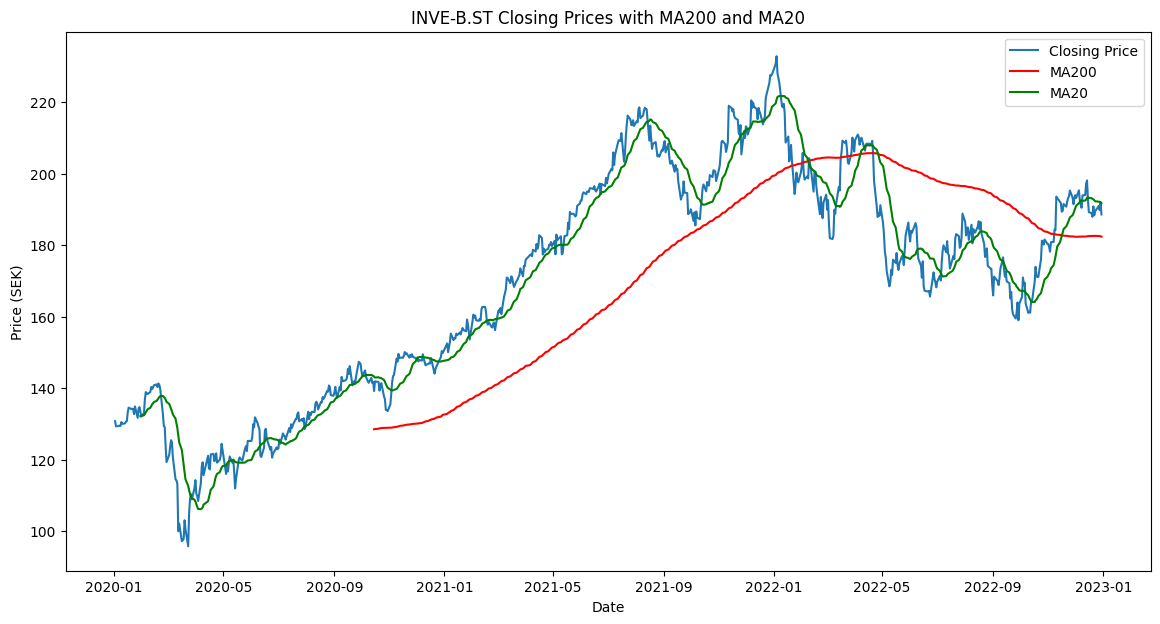

In [ ]:
# Calculate MA200 and MA20
inve_data['MA200'] = inve_data['Close'].rolling(window=200).mean() # Using some pandas functions. GPT should be able to adequately explain these concepts.
inve_data['MA20'] = inve_data['Close'].rolling(window=20).mean()

# Plotting the data along with MA200 and MA20
plt.figure(figsize=(14, 7))
plt.plot(inve_data.index, inve_data['Close'], label='Closing Price')
plt.plot(inve_data.index, inve_data['MA200'], label='MA200', color='red')
plt.plot(inve_data.index, inve_data['MA20'], label='MA20', color='green')

plt.title('INVE-B.ST Closing Prices with MA200 and MA20')
plt.xlabel('Date')
plt.ylabel('Price (SEK)')
plt.legend()
plt.show()

### 2.2 Interlude: Before We Continue, Let's Discuss RMSE

The Root Mean Square Error (RMSE) is a measure of the differences between values predicted by a model or an estimator and the actual values. In the context of financial models, RMSE provides a way to measure the effectiveness of a model in predicting stock prices, allowing analysts to gauge the accuracy of their predictions.

**Intuitively with Simple Maths**: RMSE calculates the square root of the average squared differences between the predicted and actual values. This method penalizes larger errors more than smaller ones, making it a robust measure of model accuracy.

**Formalized with Mathematical Notation**:
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (P_{i} - \hat{P_{i}})^2}$$
Where:
- $P_{i}$ is the actual value,
- $\hat{P_{i}}$ is the predicted value, and
- $n$ is the number of observations.

Note that this is only one metric to evaluate performance. RMSE is not a one-fits-all, and is particularly bad when evaluating volatility (i.e. with a GARCH-model).






### 2.3 RMSE Between MA and the Price of a Few Days Ahead

To give perspective on this, we calculate the RMSE between the MA values and the actual stock prices for a few different days ahead. This analysis helps in understanding how well a moving average predicts future price movements and can guide the selection of appropriate look-ahead periods for trading strategies.


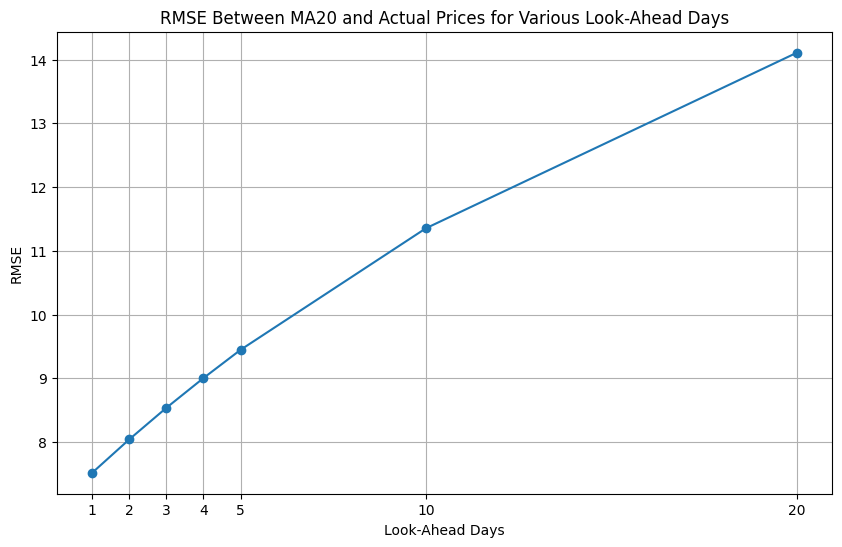

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate MA20 for simplicity in this example
inve_data['MA20'] = inve_data['Close'].rolling(window=20).mean()

look_ahead_days = [1, 2, 3, 4, 5, 10, 20] #Look ahead days
rmse_values = [] # Inisialise empty list

for days in look_ahead_days:
    # Shift the 'Close' price backwards by 'days'
    inve_data[f'Close_shifted_{days}'] = inve_data['Close'].shift(-days)

    # Align MA20 and shifted close price to ensure they have the same length
    # Drop NaN values from both to ensure consistency
    aligned_data = inve_data[['MA20', f'Close_shifted_{days}']].dropna()

    # Calculate RMSE between aligned MA20 and shifted close price
    rmse = np.sqrt(mean_squared_error(aligned_data['MA20'], aligned_data[f'Close_shifted_{days}']))
    rmse_values.append(rmse)

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.plot(look_ahead_days, rmse_values, marker='o', linestyle='-')
plt.title('RMSE Between MA20 and Actual Prices for Various Look-Ahead Days')
plt.xlabel('Look-Ahead Days')
plt.ylabel('RMSE')
plt.xticks(look_ahead_days)
plt.grid(True)
plt.show()

As we can see, the RMSE increases between the current moving average and the price $n$ days ahead as $n$ increases. This means that the moving average becomes less efficient at predicting price the more we look into the future.

### 2.4 Distribution of MA

Analyzing the distribution of moving averages (e.g., MA200) can provide insights into the most common price levels over a given period. This information can be useful for identifying support and resistance levels and understanding market sentiment. The distribution can be visualized using a histogram.

**Plotting a Histogram of the MA200 Distribution**:
To visualize the distribution of MA200, you can plot a histogram of its values. This plot can reveal the concentration of prices around certain levels, indicating prevalent market conditions over the analyzed period.


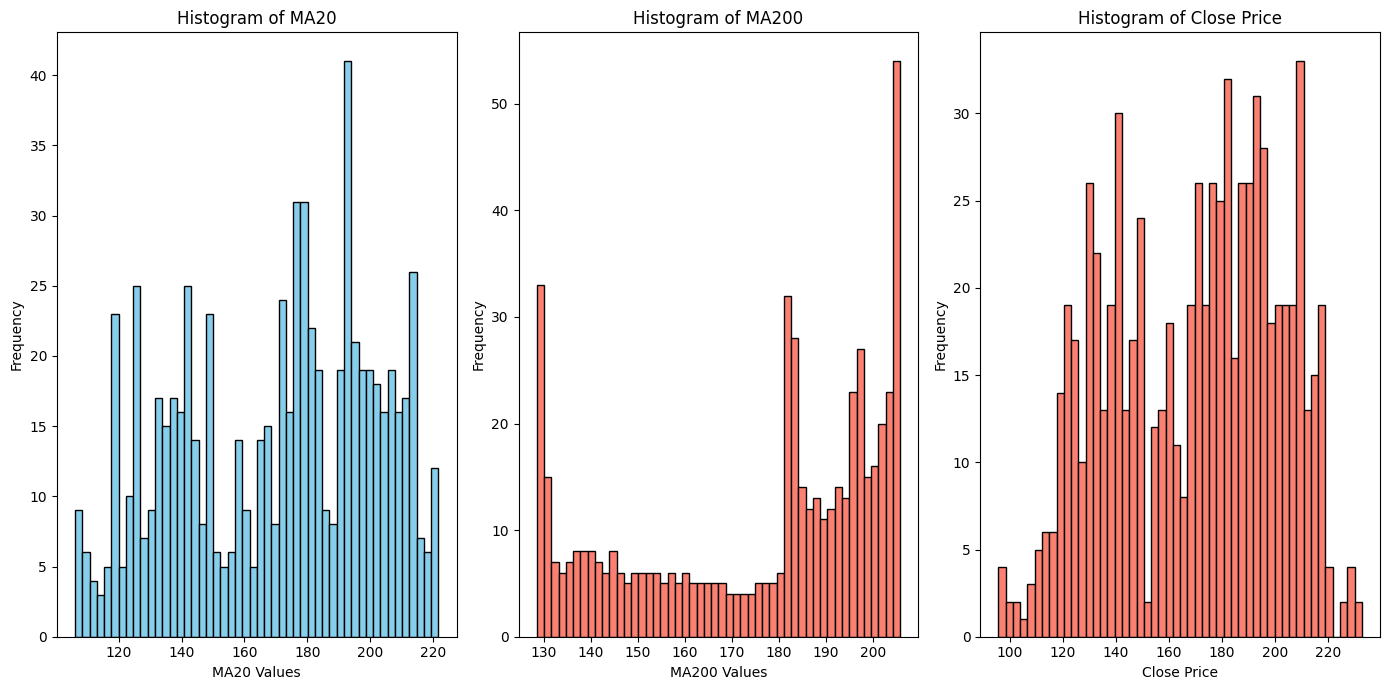

In [ ]:
# Plotting histograms for MA20 and MA200
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(inve_data['MA20'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of MA20')
plt.xlabel('MA20 Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
plt.hist(inve_data['MA200'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of MA200')
plt.xlabel('MA200 Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
plt.hist(inve_data['Close'].dropna(), bins=50, color='salmon', edgecolor='black')
plt.title('Histogram of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area.
plt.show()

#Side Note - **Log Transformation for Multiplicative Relationships**:
In financial data analysis, log transformation is a valuable technique for stabilizing variance and making data more "normal" or Gaussian. It's particularly useful when dealing with multiplicative relationships. By applying a log transformation, we can use **addition** rather than **multiplication**, simplifying the analysis of compound growth rates and other multiplicative processes.

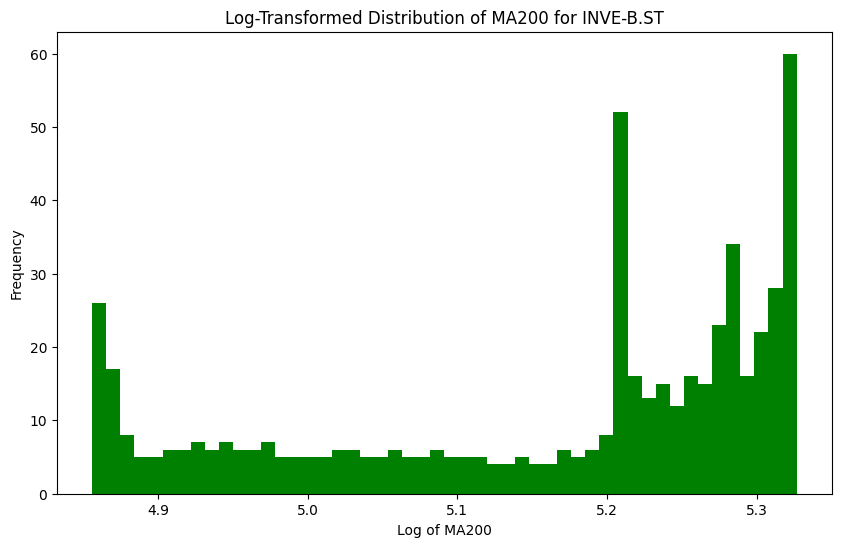

In [ ]:
import numpy as np
# Applying log transformation
inve_data['Log_MA200'] = np.log(inve_data['MA200'])

# Plotting the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(inve_data['Log_MA200'].dropna(), bins=50, color='green')
plt.title('Log-Transformed Distribution of MA200 for INVE-B.ST')
plt.xlabel('Log of MA200')
plt.ylabel('Frequency')
plt.show()

# 3. Hypothesis

Let's continue. In this section, we delve into the formulation of hypotheses within the framework of quantitative finance, leveraging economic theories and statistical analysis. Firstly some side notes.

## 3.1 Side note - Economic Theory: Efficient Markets

The Efficient Market Hypothesis (EMH) posits that financial markets are "efficient" in reflecting all available information in the prices of securities. Essentially, it suggests that it's impossible to consistently achieve higher returns on a risk-adjusted basis than the market average by exploiting information that is already reflected in stock prices.

####Intuitive Explanation:
Imagine a marketplace where every piece of news, data, or insight about a company's performance, economic indicators, political events, or even rumors instantly becomes known to all participants. As soon as this information is available, it's immediately and accurately factored into the stock prices. If a company reports higher than expected earnings, its stock price quickly rises; if a government report indicates slowing economic growth, the overall market might react negatively just as swiftly.

In such a market, trying to buy undervalued stocks or sell stocks for more than they're worth based on publicly available information would be futile, as prices already reflect all known information. This is the essence of market efficiency.

## 3.2 Look at Extreme Values of the Distribution Graph

When analyzing stock price movements, the distribution of returns can often approximate a Gaussian (normal) distribution, especially over shorter intervals. However, the tails of the distribution—representing extreme price movements—hold particular interest for quantitative analysts.
In our case, this is not the case and the hypothesis 3.3 falls short.

#### 3.2.1 If You Are Interested

These tails can be analyzed further using the concept of Extreme Value Theory (EVT), which focuses on the tails of distributions rather than the more commonly analyzed central part. EVT is particularly useful in assessing the risk of extreme market movements.

For a Gaussian distribution, the extreme values' behavior can be described mathematically, with their magnitude increasing logarithmically with the number of observations (\(n\)):
$$ \text{Extreme Value} \propto \log(n) $$

For more on Extreme Value Theory, you can explore the [Extreme Value Theory on Wikipedia](https://en.wikipedia.org/wiki/Extreme_value_theory).

# 3.3 First Hypothesis: Probability of a Price Decrease

Considering the logarithmic expansion of extreme values in a Gaussian distribution, we can formulate a hypothesis regarding stock price movements. If the current stock price is at an all-time high—representing an extreme value—one might hypothesize that the likelihood of a price decrease in the near future increases. This hypothesis rests on the premise that extreme values expand less dramatically $\log(n)$ as $n$ increases, suggesting a reversion to the mean is likely.

**Hypothesis**: Given that extreme stock price values only grow with $\log(n)$ and assuming the current price is already at a high (an extreme value), the odds of the price decreasing in the near term should be favorable.






## What are we testing?

We aim to test the hypothesis: "After a stock reaches a new high, is there a statistically significant tendency for its price to decrease in the near term?"

## Methodology

1. **Define a New High**: A new high is defined as any day's closing price that is higher than all closing prices in the previous 252 trading days (approximately one year). This period accounts for the long-term trend and ensures we are identifying significant highs.

2. **Near Term Definition**: The "near term" is defined as the following 5 trading days after reaching a new high. This timeframe is short enough to capture immediate market reactions while providing a measurable window for analysis.

3. **Calculate the Price Movement**: For each new high, we calculate the percentage change in the closing price for the next 5 trading days. This metric will help us understand the short-term price movement following a new high.

4. **Statistical Test**: We employ a one-sample t-test to compare the mean of these percentage changes against a null hypothesis mean of 0. A significant result would indicate that the price movement is either predominantly positive or negative, challenging or supporting our hypothesis, respectively.

## Mathematical Representation

- Let $P_t$ denote the closing price on day $t$.
- A new high on day $t$ is defined as $P_t > max(P_{t-1}, P_{t-2}, ..., P_{t-252})$.
- The 5-day forward return from day $t$ is calculated as $\frac{P_{t+5}}{P_t} - 1$.
- Our null hypothesis $H_0: \mu = 0$ posits that the mean forward return $\mu$ equals 0, implying no significant price movement.
- We perform the t-test: $t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$, where $\bar{x}$ is the sample mean of forward returns, $s$ is the sample standard deviation, and $n$ is the sample size.

If you don't understand this, it's okay. Just understand that we are testing the hypothesis mathematically and we formalise it into a mathematical test to make it impartial.
## Expected Outcome

The outcome of the t-test will indicate whether we can reject the null hypothesis. If the p-value is less than our significance level (commonly 0.05), we reject the null hypothesis, suggesting that the stock price movement after reaching new highs is significantly different from zero. This could provide empirical support for our hypothesis that stock prices tend to decrease in the short term after hitting new highs.


In [ ]:
from scipy.stats import ttest_1samp

# Assuming 'inve_data' is a DataFrame containing your stock data with a 'Close' column

# Calculate the rolling maximum closing price over the previous 252 trading days
inve_data['Rolling_Max'] = inve_data['Close'].rolling(window=252, min_periods=1).max()

# Identify new highs
inve_data['New_High'] = inve_data['Close'] == inve_data['Rolling_Max']

# Calculate the 5-day forward return from each day
inve_data['Forward_Return'] = inve_data['Close'].shift(-5) / inve_data['Close'] - 1

# Filter for days that are new highs and have a valid forward return
new_highs_data = inve_data[inve_data['New_High'] & inve_data['Forward_Return'].notna()]

# Perform a one-sample t-test against the null hypothesis that the mean forward return is 0
t_stat, p_value = ttest_1samp(new_highs_data['Forward_Return'], 0)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The mean forward return is significantly different from 0. We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis. The mean forward return is not significantly different from 0.")

T-statistic: -0.12766590896563065, P-value: 0.8987377871571092
We cannot reject the null hypothesis. The mean forward return is not significantly different from 0.


Basically, our hypothesis is bad.

## Question:
Try to come up with a better hypothesis.

## 3.4 Maybe the Stock Continues to Grow at a High?

It's equally plausible that a stock reaching new highs is indicative of strong momentum and may continue to rise. This scenario is often guided by the belief in momentum investing, where investors follow the trend on the assumption that securities moving up will continue their trajectory.

### Momentum Investing

Momentum investing suggests that stocks which have performed well in the past will continue to perform well in the short to medium term, and stocks that have performed poorly will continue to perform poorly. This strategy would argue against the previous hypothesis, suggesting instead that new highs may be followed by further gains.

## 3.5 Setting the Buy and Sell Conditions

In the context of our analysis, we can define buy and sell conditions based on the hypothesis and the counter-hypothesis:

- **Buy Condition**: If we believe in the reversion to the mean (our initial hypothesis), we might set a buy condition for stocks that have dropped in price shortly after hitting new highs, expecting a correction.
- **Sell Condition**: Conversely, if we lean towards the momentum investing hypothesis, we might set a buy condition when a stock reaches a new high, expecting the upward trend to continue.

These conditions can be fine-tuned based on additional indicators, risk tolerance, and investment goals.

## 4. Let's Backtest

Backtesting is the process of testing a trading strategy on historical data to see how it would have performed. It's a critical step in developing any trading strategy, providing insights into its potential profitability and risk.

### 4.1 Lookback and Lookahead

- **Lookback Period**: This is the period over which historical data is analyzed to make a trading decision. For instance, if our strategy involves moving averages, the lookback period would be the length of time used to calculate the moving average.
- **Lookahead Period**: This is the period after a trading decision is made during which the strategy's performance is evaluated. It's crucial for assessing the outcome of trades and the overall effectiveness of the strategy.

#### Why It's Important

The lookback and lookahead periods must be carefully selected to avoid bias, especially the lookahead bias, where future information (not available at the time of trade) is inadvertently used to make trading decisions. Ensuring that these periods are appropriately set is essential for a realistic assessment of the strategy's performance.

### Example

Consider a simple moving average crossover strategy:

- **Lookback Period**: The lengths of the short and long moving averages (e.g., 20 and 50 days).
- **Lookahead Period**: The period after the crossover during which the performance of the trade is measured (e.g., 5 days after the buy signal).

By backtesting with these parameters, we can evaluate the historical performance of the strategy and make informed adjustments to improve its effectiveness.

# What does this tell us?
Well, we do not have a clear lookback period for our strategy, thus making it practically impossible to backtest with an exception for various purged cross validation methods (not discussed). We will henceforth use the **simple MA crossover** [search on web if unfamiliar] and backtest that on the data. Note that this may be dubious for various of reasons, not to mention the lookahead bias. But for demonstration purposes, this is a quite illustrative method.

# 4.2 Walkforward Algorithm: An Overview
The key idea behind the walk-forward algorithm is to simulate a rolling window of real-life trading. You first develop and optimize your strategy on a segment of data (in-sample), then test how this optimized strategy would have performed immediately after (out-of-sample). This process is repeated by rolling forward through the dataset, providing a more realistic assessment of a strategy's effectiveness and adaptability over time.

## Walkforward Algorithm Steps:

Divide the Data: Split your historical data into multiple segments, each with an in-sample and an out-of-sample period.
Optimize: Use the in-sample data to optimize the parameters of your trading strategy.
**Test:** Apply the optimized parameters to the subsequent out-of-sample data to test the strategy's performance.
**Roll Forward:** Shift the in-sample and out-of-sample windows forward and repeat the process.
**Aggregate Results:** Combine the results from all out-of-sample tests to evaluate the overall performance of the strategy.


Below is a simplified example of implementing a walk-forward analysis in Python. This example doesn't include the optimization step for simplicity, but it demonstrates the process of testing a strategy across multiple rolling periods.

(For further reading, I highly recommend the book: Testing and Tuning Market Trading Systems by Timothy Masters)

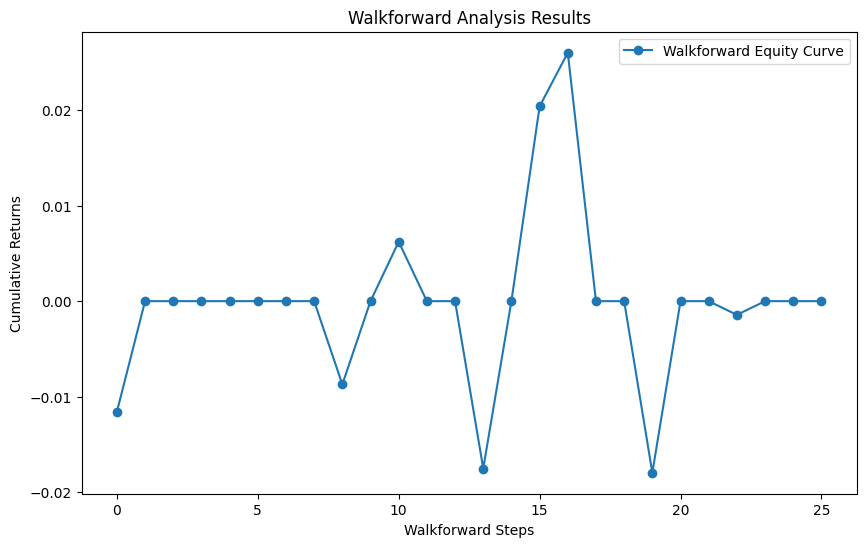

In [ ]:
# Define your strategy parameters (e.g., MA short and long periods)
ma_short = 20
ma_long = 40

# Add MA columns to your dataframe
inve_data['MA_Short'] = inve_data['Close'].rolling(window=ma_short).mean()
inve_data['MA_Long'] = inve_data['Close'].rolling(window=ma_long).mean()

# Signal: MA_Short crosses above MA_Long
inve_data['Signal'] = np.where(inve_data['MA_Short'] > inve_data['MA_Long'], 1, 0)

# Define walk-forward parameters
window_size = 252  # Approx. one trading year
step_size = 20  # Step forward

# Placeholder for walk-forward results
walkforward_results = []

for start in range(0, len(inve_data) - window_size, step_size):
    # Define the in-sample and out-of-sample periods
    end = start + window_size
    data_in_sample = inve_data.iloc[start:end]
    data_out_of_sample = inve_data.iloc[end:end+step_size]

    # Here you would optimize your strategy parameters on the in-sample data
    # For simplicity, we skip the optimization step

    # Test the strategy on the out-of-sample data
    out_of_sample_returns = data_out_of_sample['Signal'].diff() * data_out_of_sample['Close'].pct_change()
    walkforward_results.append(out_of_sample_returns.sum())

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(walkforward_results, '-o', label='Walkforward Equity Curve')
plt.title('Walkforward Analysis Results')
plt.xlabel('Walkforward Steps')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## Question:
What is the fundamental flaw in this backtest?

# 4.3 Robustness
The robustness of a trading strategy, particularly a moving average (MA) crossover strategy in this context, refers to its ability to maintain performance across various market conditions and parameter settings. Assessing robustness is crucial because a strategy that works well under specific historical conditions may not necessarily perform well in the future or under different market conditions. Here’s how to evaluate the robustness of the strategy across different MAs and lookahead periods, building on the insights from the heat maps and the backtesting results:

## Evaluating Across Different MAs
Parameter Stability: A robust strategy should not be overly sensitive to the specific lengths of the moving averages used. If small changes in MA lengths lead to significant variations in performance, the strategy might be overfitted to the historical data, capturing noise rather than underlying market trends.

#### Broad Efficacy:
The strategy should show good performance across a wide range of MA settings. This broad efficacy suggests that the strategy's logic is sound and not tailored to exploit peculiarities of the dataset used for backtesting.
Assessing Across Lookahead Periods

####Consistent Performance:
Look for consistency in performance across different lookahead periods. A strategy that performs well only for a narrow range of lookahead periods may not be adaptable enough to handle the dynamic nature of financial markets.
Adaptability: The ability to generate positive returns across various lookahead periods can indicate the strategy's adaptability. This adaptability is a key aspect of robustness, as it suggests the strategy can remain effective even as market conditions evolve.

## Robustness Indicators from Heat Maps
####Visual Patterns:
Heat maps that show consistent performance across a range of MA combinations and lookahead periods can visually indicate a strategy's robustness. Uniformly high returns (or consistently meeting a performance benchmark) suggest that the strategy may be robust.

####Performance Clusters:
Identify areas within the heat maps where the strategy seems to perform best. A robust strategy would ideally not be confined to a small cluster of parameters but should show resilience across broader parameter ranges.

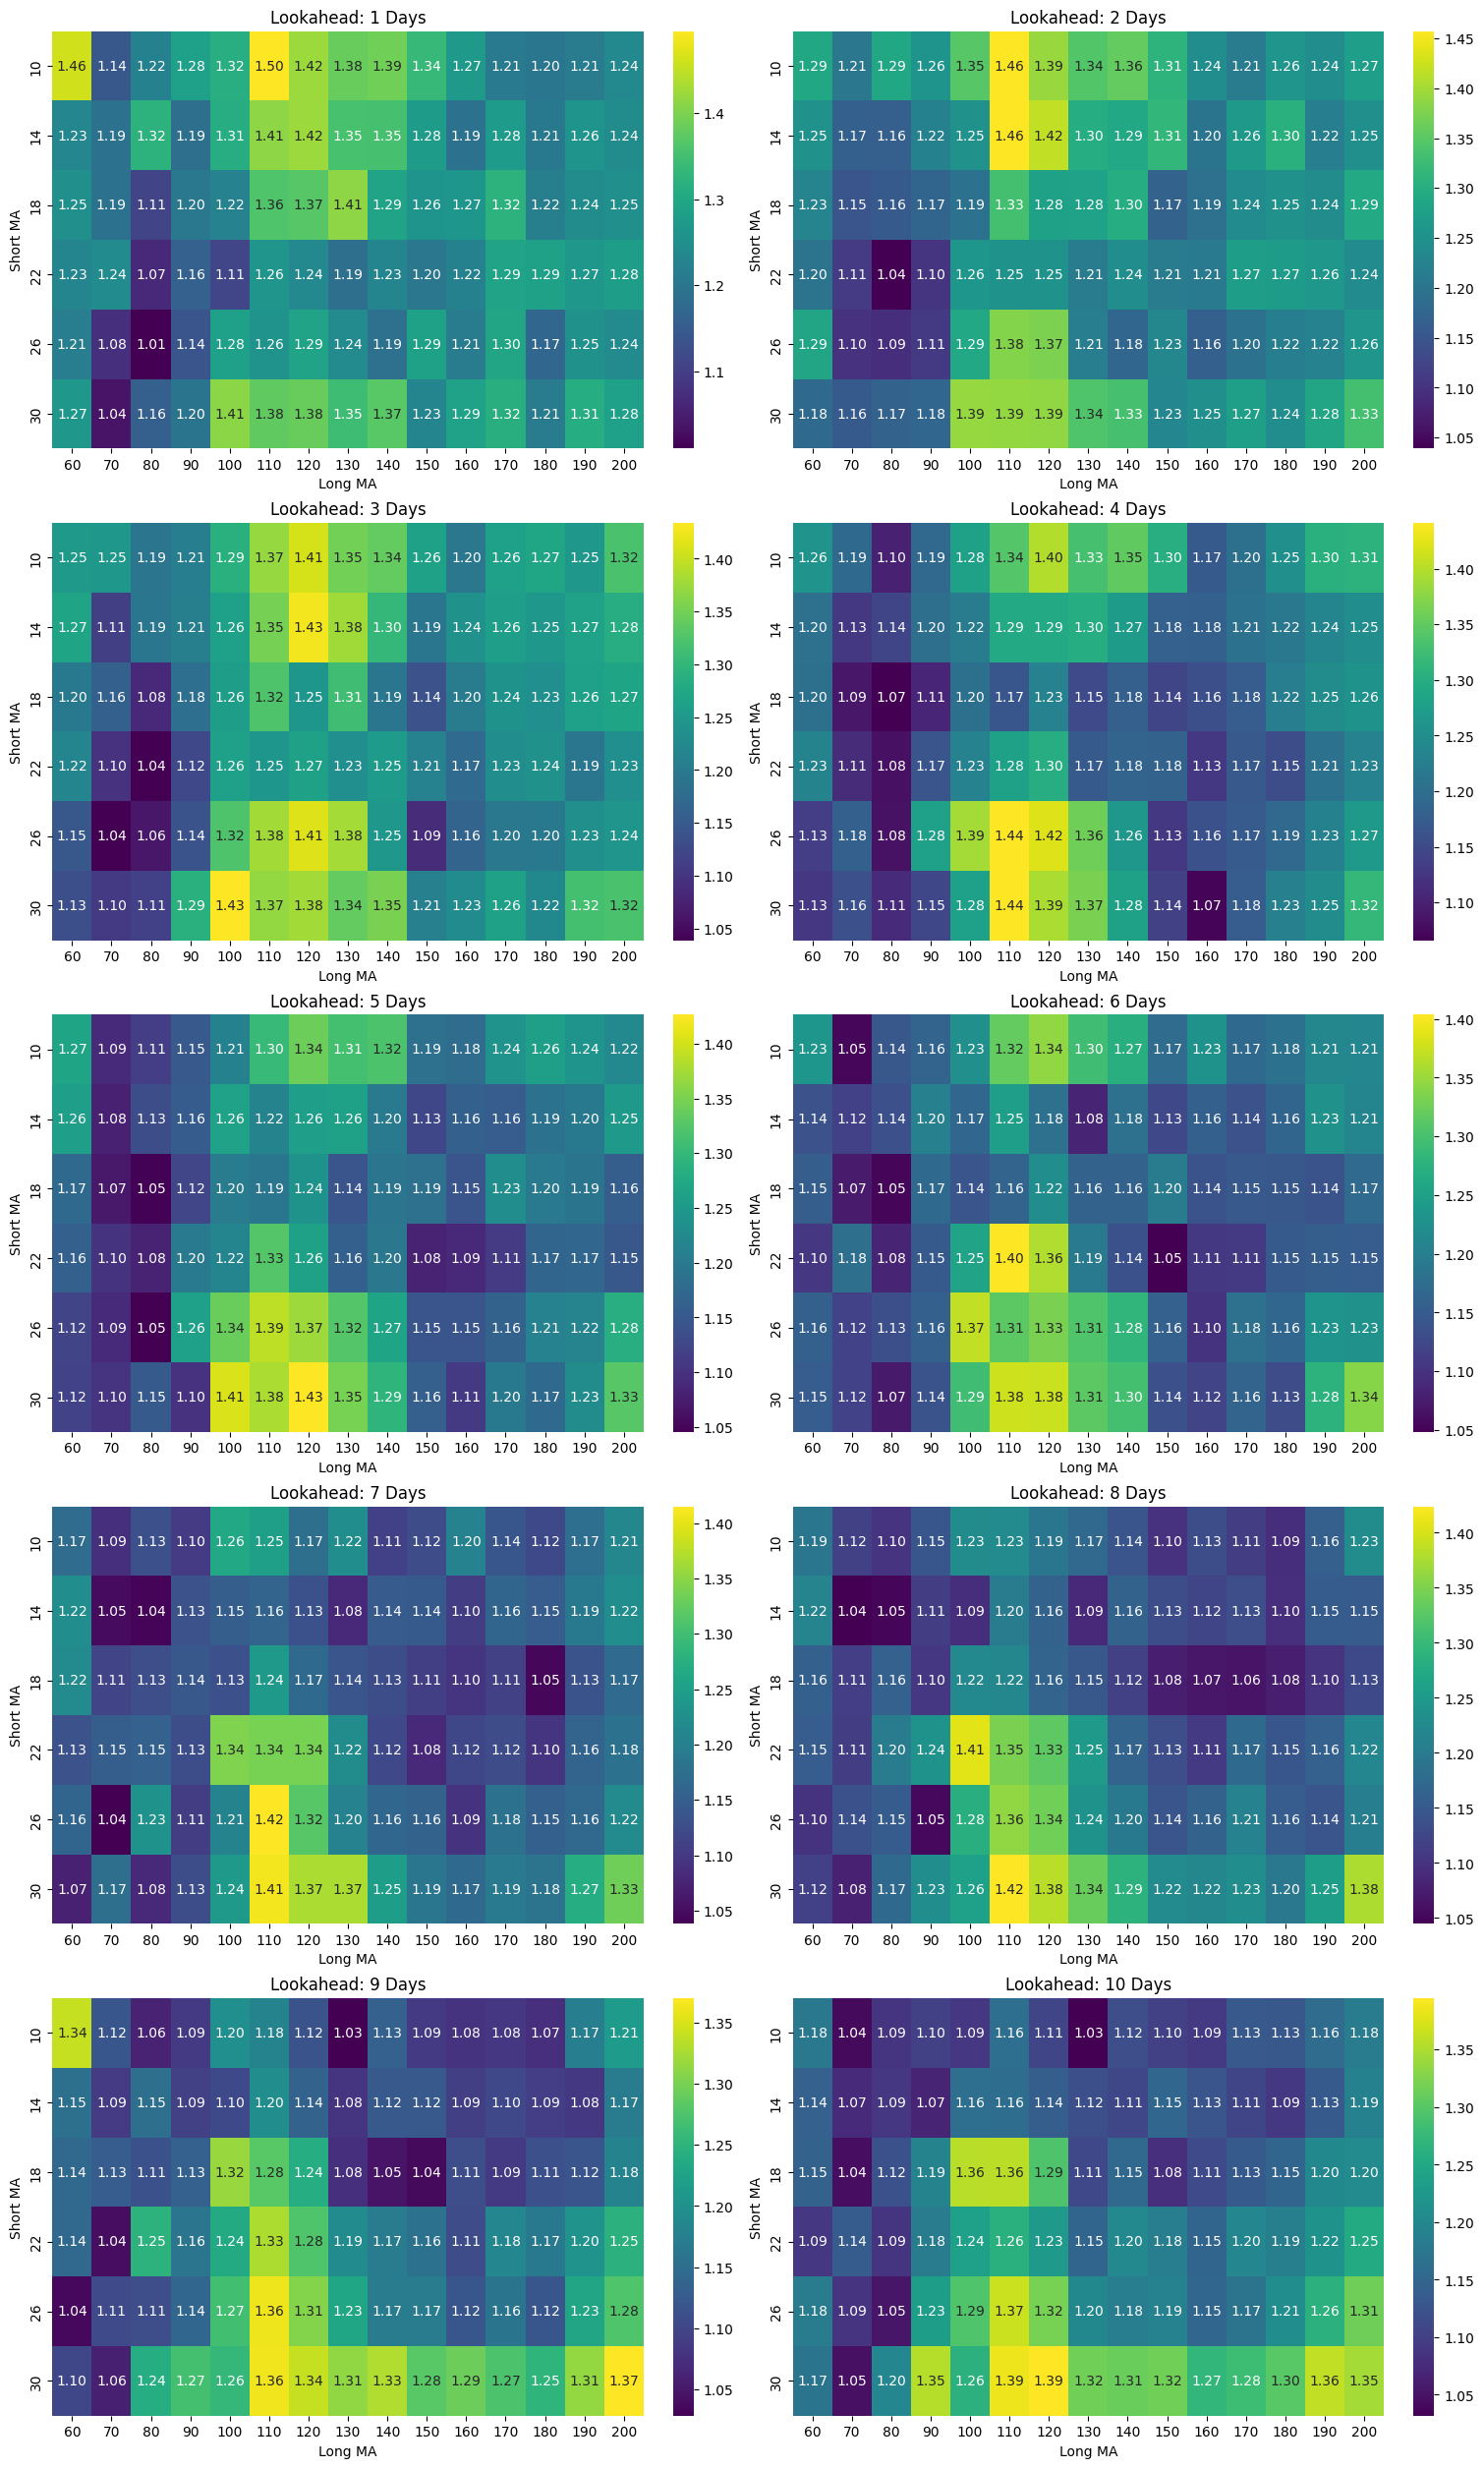

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a smaller sample of MA lengths for demonstration purposes
short_ma_options = range(10, 31, 4)  # Short MAs
long_ma_options = range(60, 201, 10)  # Long MAs

# Define lookahead periods
lookahead_periods = range(1, 11)

# Initialize a dictionary to store results for each lookahead period
results = {lookahead: pd.DataFrame(index=short_ma_options, columns=long_ma_options) for lookahead in lookahead_periods}

for lookahead in lookahead_periods:
    for ma_short in short_ma_options:
        for ma_long in long_ma_options:
            if ma_short >= ma_long:
                continue

            inve_data['MA_Short'] = inve_data['Close'].rolling(window=ma_short).mean()
            inve_data['MA_Long'] = inve_data['Close'].rolling(window=ma_long).mean()

            # Generate signals
            inve_data['Signal'] = pd.Series(np.where(inve_data['MA_Short'] > inve_data['MA_Long'], 1, 0), index=inve_data.index).shift(1)


            # Calculate strategy returns
            inve_data['Strategy_Return'] = inve_data['Signal'] * inve_data['Close'].pct_change().shift(-lookahead)

            # Calculate cumulative return for the strategy
            cumulative_return = (1 + inve_data['Strategy_Return'].fillna(0)).cumprod().iloc[-1]

            # Store the final cumulative return
            results[lookahead].loc[ma_short, ma_long] = cumulative_return

# Plotting
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25), constrained_layout=True)
for i, (lookahead, result_df) in enumerate(results.items()):
    sns.heatmap(result_df.astype(float), ax=axes[i // 2, i % 2], cmap='viridis', annot=True, fmt=".2f")
    axes[i // 2, i % 2].set_title(f'Lookahead: {lookahead} Days')
    axes[i // 2, i % 2].set_xlabel('Long MA')
    axes[i // 2, i % 2].set_ylabel('Short MA')

plt.show()


# Question:
What would you improve? Are there any major pitfalls in the example above? Is the strategy profitable?

# **More Questions:**

1.

a) How do you define trends? Are they short-term or long-term? Please elaborate.

b) You mentioned noise; could you provide a clear example of noise in the data? Ignoring what I've written in the notebook, can you find an online model that could identify larger trends in the data, perhaps something cyclical?

c) Looking far back in the dataset, how relevant would you say the data from, for example, 2006 is compared to 2022 and 2024? Why?

2.

a) The P/E ratio = price/earnings, or in Swedish, aktiepris/vinst. This key figure, along with its variants, is a common method for evaluating profitability in relation to the stock price and is updated quarterly when companies release their reports. Again, the P/E ratio is a key figure and is updated every quarter (≈65 market days). The MA-20 is a trend follower that is gradually updated over time, in this case, every 20 days. I haven't given you much information so far, but how would you argue both for and against this strategy? In this case, what time horizon are we aiming for?

b) It is likely the variation in the P/E ratio we are looking for (P/E ratio goes down leads to either an increase in earnings or a decrease in stock price). If we think purely in terms of stock trends, can we match a specific trend with a variation in the P/E ratio? How does your written hypothesis change with this insight?

3.

a)Why is lookback important? Use command+f to find the term "lookahead bias."  This is an important concept that many professional quants get wrong. Explain what it is and how it occurs in the MA-crossover strategy.

4.

a) You are beginning to understand lookback and lookahead but need to think about what the ultimate goal of robustness analysis is. How would "larger and smaller lookahead spans" help?

b) How do you identify robust areas in the plot?

c) The numbers from the heatmap cells correspond, as written, to our total hypothetical profit over 3 years. Think about the word "robust" and try to explain which MA parameters (e.g., MA18 and MA180) should be chosen to be as "certain" of a profit as possible (historically, of course)?

d) Finally, an important concept is OOS. What is the point of "Out Of Sample" tests?
